# K Means Clustering

Seção 10 do **Introduction to Statistical Learning**.

Método de Machine Learning baseado em aprendizado **não supervisionado** que tentará agrupar seus dados em grupos baseados em características similares.

São usados para:

- Agrupamento automático de documentos
- Agrupamento de clientes
- Segmentação de mercado
- Geoestatística

O objetivo é dividir os dados em K grupos distintos baseado nos parâmetros.

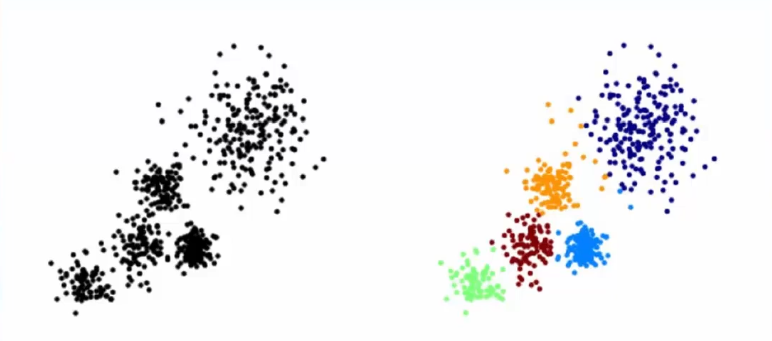

In [1]:
from IPython.display import Image
Image('../img/k_means_cluster.png')

### O algoritmo

- Escolher um número K de grupos (clusters)
- Aleatoriamente definir uma classe para todos os pontos
- **Até os clusters pararem de mudar, faça:**
- Para cada cluster, obtenha o centroide do mesmo calculando a média dos vetores dos pontos do cluster.
- Defina cada ponto ao cluster na qual o centroide é o mais próximo.

### Escolhendo um valor para K

Não existe uma resposta fácil para escolher o melhor valor para K. Uma forma é o **método do cotovelo**.

Primeiro calculamos a soma dos erros quadrados (SEQ) para alguns valores de K (por exemplo 2, 4, 6,...). A soma dos quadrados dos erros é definido como o quadrado das distâncias entre cada membro e seu centroide.

Se plotar K vs SEQ, é evidente que o erro diminui à medida em que o K aumenta.

A ideia é escolher um valor de K na qual o SEQ cai abruptamente. Isso produz um "efeito cotovelo" no gráfico, como se pode ver a seguir:

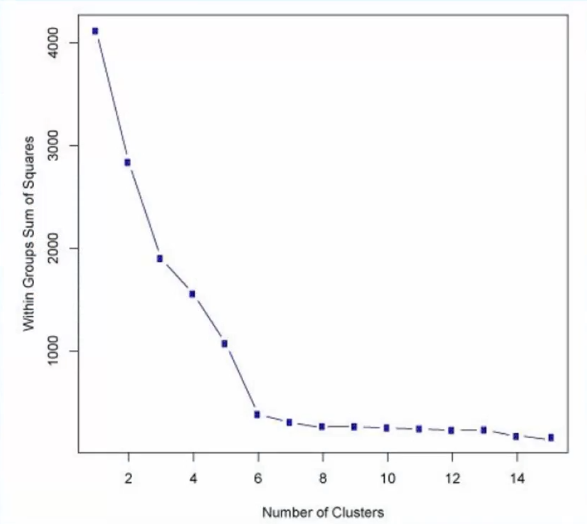

In [2]:
Image('../img/cotovelo.png')

*Nesse caso o ideal seria K = 6*

## K Means Cluster em Python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# criando dados aleatorios em clusters
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=50)

In [6]:
type(data)

tuple

In [8]:
len(data)

2

In [11]:
# dados
data[0]

array([[-8.93722174e-01,  9.15701092e+00],
       [ 1.23585696e+00, -7.13688556e+00],
       [-2.36890848e+00,  5.90117122e+00],
       [-1.56744385e+00,  8.83066676e+00],
       [-5.91162281e+00, -3.99788697e+00],
       [-2.57213409e+00, -4.56276818e+00],
       [-1.58565923e+00,  1.14534495e+01],
       [-8.17087621e-01, -5.17172944e+00],
       [-2.02558502e-01, -6.58004386e+00],
       [-6.56528804e+00, -2.18963876e+00],
       [-5.14930135e+00, -3.01962800e+00],
       [-4.44413629e+00,  8.93666381e+00],
       [-2.40161178e+00, -2.36014899e+00],
       [-2.79736853e+00,  2.36246827e+00],
       [-5.84548867e+00, -5.57179725e-01],
       [-2.01405317e+00,  4.14220478e+00],
       [-2.95041121e+00,  1.11585792e+01],
       [-9.45265788e-01,  1.03557821e+01],
       [-5.23853914e+00, -1.53946762e+00],
       [-4.74274653e+00, -1.95761215e+00],
       [-7.00341952e+00, -3.75603497e+00],
       [-2.75979554e+00,  3.07510679e+00],
       [-4.88766545e+00,  1.07255479e+01],
       [-1.

In [12]:
# classes
data[1]

array([2, 0, 3, 3, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 3,
       2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 1, 0, 0, 1, 1, 1, 3, 3, 2, 1, 3, 3,
       0, 0, 2, 3, 3, 2, 0, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0, 0, 2, 0, 0, 2,
       0, 3, 2, 2, 0, 1, 2, 0, 3, 3, 1, 3, 3, 0, 1, 3, 1, 1, 1, 1, 2, 0,
       2, 1, 0, 2, 0, 3, 3, 1, 0, 3, 0, 3, 1, 0, 3, 2, 3, 0, 3, 1, 1, 2,
       0, 1, 2, 2, 1, 3, 2, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 3, 2, 0, 1, 0,
       0, 3, 2, 3, 0, 2, 2, 1, 2, 3, 2, 1, 1, 2, 0, 3, 0, 1, 2, 1, 3, 0,
       0, 3, 2, 0, 0, 0, 3, 3, 1, 0, 1, 1, 1, 3, 0, 0, 0, 0, 1, 3, 0, 2,
       1, 0, 2, 3, 0, 3, 3, 2, 1, 0, 1, 2, 3, 0, 3, 3, 1, 3, 0, 2, 1, 3,
       1, 2])

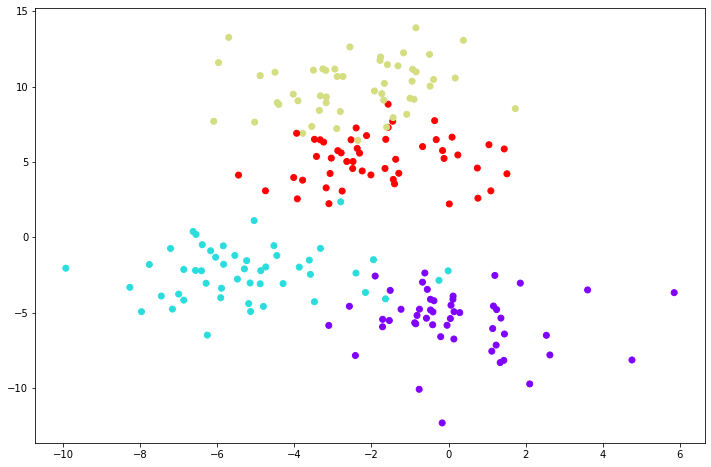

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')

In [15]:
from sklearn.cluster import KMeans

In [24]:
# sabemos que tem 4 grupos, por isso n_clusters=4
kmeans = KMeans(n_clusters=4)

In [18]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
kmeans.cluster_centers_

array([[-5.64892498, -2.38445033],
       [-2.37178661, 10.27788487],
       [ 0.11584155, -5.37562512],
       [-1.94847438,  5.20472404]])

In [20]:
kmeans.labels_

array([1, 2, 3, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 3, 0, 3, 1, 1, 0, 0, 0, 3,
       1, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 2, 2, 0, 0, 0, 3, 3, 1, 0, 3, 3,
       2, 2, 1, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 0, 0, 3, 2, 2, 1, 2, 2, 1,
       2, 3, 1, 1, 2, 0, 3, 2, 3, 3, 0, 3, 3, 2, 0, 3, 0, 0, 0, 0, 1, 2,
       1, 0, 2, 1, 2, 3, 3, 0, 2, 3, 2, 3, 0, 2, 3, 1, 3, 2, 3, 2, 0, 1,
       2, 0, 1, 1, 0, 3, 1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 3, 3, 2, 0, 2,
       2, 3, 1, 3, 2, 1, 1, 0, 1, 3, 3, 2, 0, 1, 2, 3, 2, 0, 1, 0, 3, 2,
       2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 0, 0, 0, 3, 2, 2, 2, 2, 0, 3, 2, 3,
       0, 2, 1, 3, 2, 3, 3, 1, 0, 2, 0, 1, 3, 2, 3, 3, 0, 3, 2, 1, 0, 3,
       0, 1])

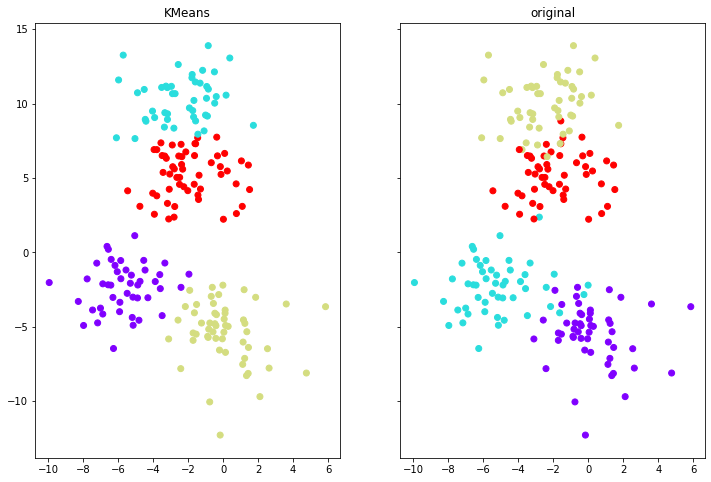

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 8))
ax1.set_title('KMeans')
ax1.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_, cmap='rainbow') # previsoes do modelo 
ax2.set_title('original')
ax2.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')